In [1]:
import matplotlib.pyplot as plt
import numpy as np
def plot_mean_with_confidence(arrays, init_size, batch_size, labels, title, xlabel, ylabel, filepath):
    means = []
    stds = []

    for arr in arrays:
        mean_values = np.mean(arr, axis=(0, 1))
        std_values = np.std(arr, axis=(0, 1))

        means.append(mean_values)
        stds.append(std_values)

    means = np.array(means)
    stds = np.array(stds)
    print(means.shape, stds.shape)
    z_axis = np.arange(init_size, init_size + batch_size * means.shape[1], batch_size)

    for i in range(len(arrays)):
        plt.plot(z_axis, means[i], label=labels[i])
        plt.fill_between(
            z_axis,
            means[i] - stds[i],
            means[i] + stds[i],
            alpha=0.2
        )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(filepath)
    plt.show()
    return

In [2]:
passive_data = np.load('passive_learning_results.npz')
passive_learning_training = passive_data['training']
passive_learning_testing = passive_data['testing']

uncertainty_data = np.load('uncertainty_sampling.npz')
uncertainty_sampling_training = uncertainty_data['training']
uncertainty_sampling_testing = uncertainty_data['testing']

qbc_data = np.load('query_by_committee.npz')
qbc_sampling_training = qbc_data['training']
qbc_sampling_testing = qbc_data['testing']

fuzzy_knn_data = np.load('fuzzy_knn_results.npz')
fuzzy_knn_sampling_training = fuzzy_knn_data['training']
fuzzy_knn_sampling_testing = fuzzy_knn_data['testing']

quire_data = np.load('quire_learning_results.npz')
quire_training = quire_data['training']
quire_testing = quire_data['testing']

nn_data = np.load('nn_learning_results.npz')
nn_training = nn_data['training']
nn_testing = nn_data['testing']


#dl_training = np.load("alternate_deep_ learning_train_acc.npy")
#dl_testing = np.load("alternate_deep_learning_pipeline_test_acc.npy")



n_init = 2240
batch_size = 150

(12, 30) (12, 30)


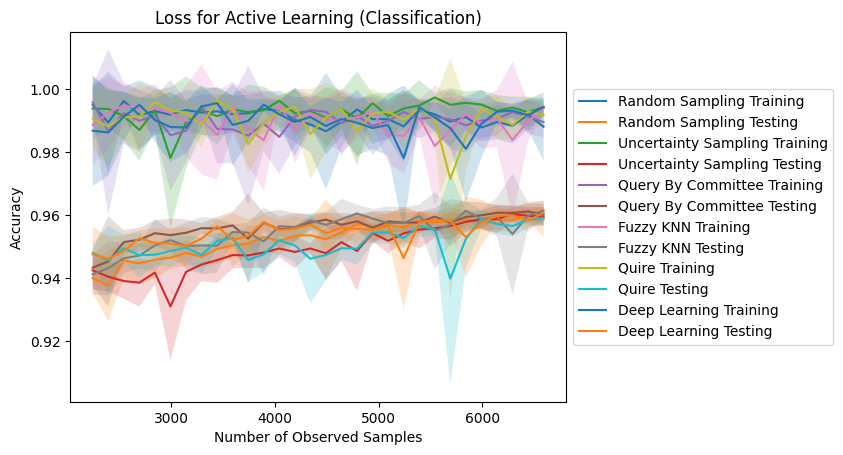

In [3]:
plot_mean_with_confidence([passive_learning_training, passive_learning_testing, uncertainty_sampling_training, uncertainty_sampling_testing, qbc_sampling_training, qbc_sampling_testing, fuzzy_knn_sampling_training, fuzzy_knn_sampling_testing, quire_training, quire_testing, nn_training, nn_testing], n_init, batch_size,
                          ["Random Sampling Training", "Random Sampling Testing", "Uncertainty Sampling Training", "Uncertainty Sampling Testing", "Query By Committee Training", "Query By Committee Testing", "Fuzzy KNN Training", "Fuzzy KNN Testing", "Quire Training", "Quire Testing", "Deep Learning Training", "Deep Learning Testing"],
                          "Loss for Active Learning (Classification)", "Number of Observed Samples", "Accuracy", "loss_train_and_test.png")

(6, 30) (6, 30)


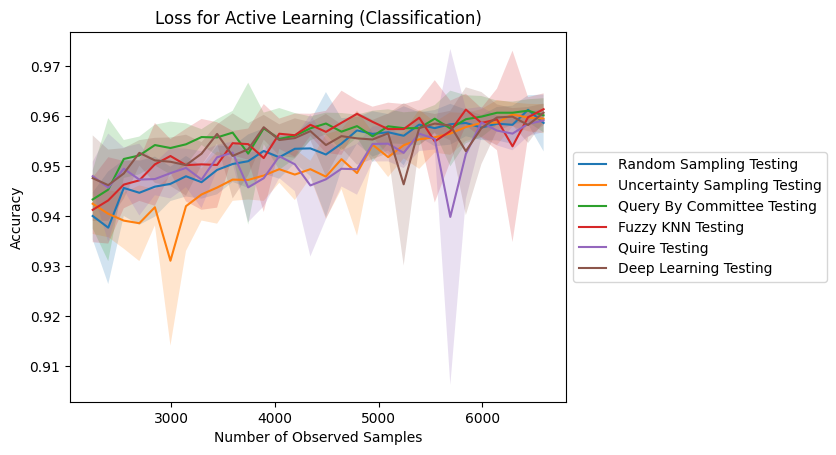

In [4]:
plot_mean_with_confidence([passive_learning_testing, uncertainty_sampling_testing, qbc_sampling_testing, fuzzy_knn_sampling_testing, quire_testing, nn_testing], n_init, batch_size,
                          ["Random Sampling Testing", "Uncertainty Sampling Testing", "Query By Committee Testing", "Fuzzy KNN Testing", "Quire Testing", "Deep Learning Testing"],
                          "Loss for Active Learning (Classification)", "Number of Observed Samples", "Accuracy", "loss_test.png")

# Pie Chart of Features

In [74]:
uncertainty_sampling_features = ["RPS27", "RPLP1", "MT-CO1", "RPL13", "RPS29", "MT-CO3", "TMSB4X", "RPS14", "RPL31", "MT-CYB"]
query_by_committee_features = ["RPS27", "RPLP1", "MT-CO1", "RPL13", "RPS29", "TMSB4X", "MT-CO3", "RPS14", "RPL31", "MT-CYB"]
fuzzy_knn_features = ["RPS27", "RPLP1", "MT-CO1", "RPL13", "RPS29", "MT-CO3", "TMSB4X", "RPS14", "RPL31", "MT-CYB"]
quire_features = ["RPS27", "MT-CO1", "TMSB4X", "RPLP1", "RPS29", "RPL13", "MPO", "MT-CO3", "CD72", "MT-ND2"]
deep_learning_features = ["RPL11", "LPP", "HCCS", "RPS19", "HLA-DRA", "EDA2R", "GNAQ", "MTCYB", "RPLP0", "MT-ND4L"]
differential_gene_expression_features = ["MBOAT7", "SAE1", "KLRB1", "SAAL1", "S1PR2", "S1OOP", "S100A9", "S100A8", "SAFB", "SQLE"]

In [71]:
import matplotlib.pyplot as plt
from venn import venn

def create_venn_diagram(lists, labels=None):
    # Set default labels if not provided
    if labels is None:
        labels = [f'List {i+1}' for i in range(len(lists))]
    
    # Convert lists to sets and create a dictionary
    data_dict = {labels[i]: set(lists[i]) for i in range(len(lists))}
    
    # Create the Venn diagram
    plt.figure(figsize=(12, 10))
    venn(data_dict, fmt="{size}")
    
    plt.title('Overlapping Elements Between Lists')
    return plt

<Figure size 1200x1000 with 0 Axes>

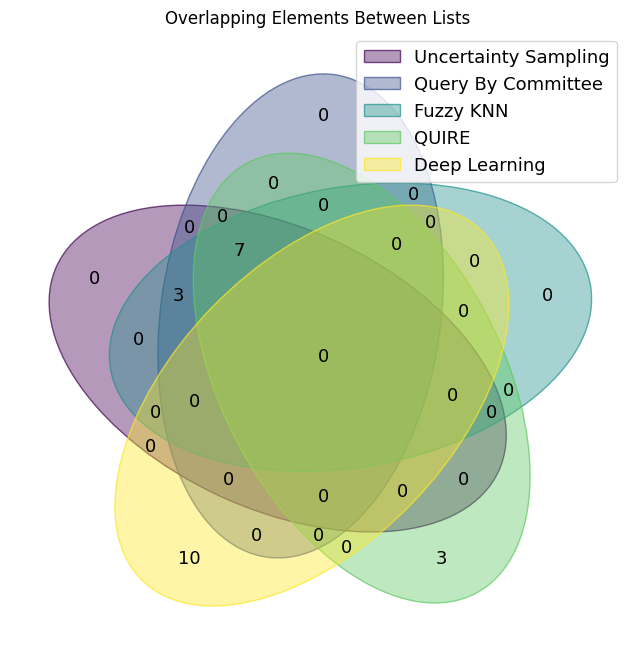

In [ ]:
plt = create_venn_diagram([uncertainty_sampling_features, query_by_committee_features, fuzzy_knn_features, quire_features, deep_learning_features],
                          ['Uncertainty Sampling', 'Query By Committee', 'Fuzzy KNN', 'QUIRE', 'Deep Learning'])
plt.show()

{'RPS14', 'MT-CO1', 'RPS19', 'RPL11', 'MT-CO3', 'MTCYB', 'CD72', 'MT-ND2', 'RPLP1', 'MT-ND4L', 'RPS27', 'LPP', 'HCCS', 'RPS29', 'RPL13', 'RPL31', 'HLA-DRA', 'TMSB4X', 'MPO', 'GNAQ', 'MT-CYB', 'RPLP0', 'EDA2R'}


<Figure size 1200x1000 with 0 Axes>

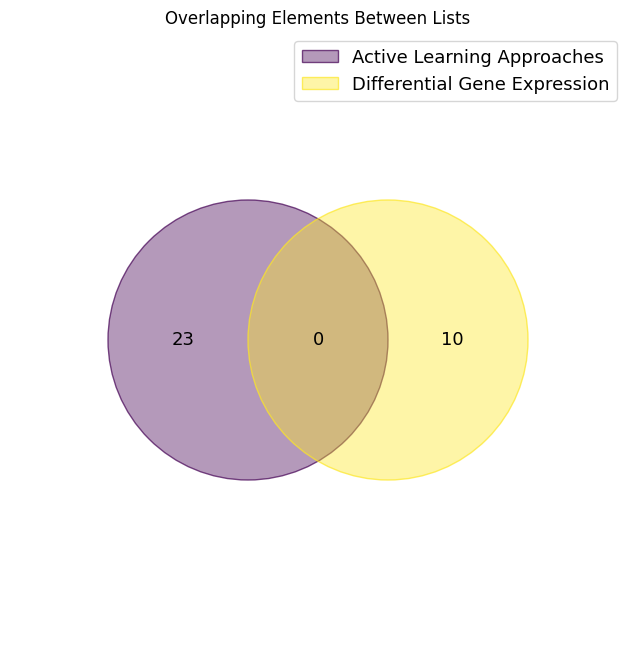

In [76]:
active_learning = set(uncertainty_sampling_features + query_by_committee_features + fuzzy_knn_features + quire_features + deep_learning_features)
print(active_learning)



plt = create_venn_diagram([active_learning, differential_gene_expression_features],
                          ['Active Learning Approaches', 'Differential Gene Expression'])
plt.show()

# Gene Comparison

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

def compare_gene_lists(csv_file, active_learning_lists, differential_genes):
    """
    Compare Log2FC metrics between active learning gene lists and differential gene expression genes
    
    Parameters:
    -----------
    csv_file : str
        Path to CSV file with gene expression data
    active_learning_lists : list of lists
        List of gene lists from active learning methods
    differential_genes : list
        List of genes from differential expression method
    """
    # Load the CSV data
    df = pd.read_csv(csv_file)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1.5]})
    
    # 1. Top plot: Compare Log2FC distributions between methods
    ax = axes[0]
    
    # Get genes from active learning lists and differential genes that exist in our data
    al_genes = set()
    for gene_list in active_learning_lists:
        al_genes.update(gene_list)
    
    # Filter data for the two groups
    al_data = df[df['Gene'].isin(al_genes)]
    diff_data = df[df['Gene'].isin(differential_genes)]
    
    # Add a category column for plotting
    al_data['Method'] = 'Active Learning'
    diff_data['Method'] = 'Differential Expression'
    
    # Combine the data
    plot_data = pd.concat([al_data, diff_data])
    
    # Create boxplot for Log2FC comparison
    sns.boxplot(x='Method', y='Log2FC', data=plot_data, ax=ax)
    sns.stripplot(x='Method', y='Log2FC', data=plot_data, 
                 size=8, color='black', alpha=0.6, ax=ax)
    
    ax.set_title('Log2FC Comparison Between Methods', fontsize=14)
    ax.set_ylabel('Log2 Fold Change', fontsize=12)
    ax.set_xlabel('')
    
    
    # 2. Bottom plot: Heatmap of the top 10 genes by absolute Log2FC
    ax = axes[1]
    
    # Get top 10 genes by absolute Log2FC value
    top_genes = df.iloc[df['Log2FC'].abs().argsort()[-10:][::-1]]
    
    # Create a heatmap for these genes
    heatmap_data = top_genes.set_index('Gene')[['Mean_Ctrl', 'Mean_AA', 'Log2FC']]
    
    # Add color-coded method information
    method_map = {}
    for gene in heatmap_data.index:
        if gene in al_genes and gene in differential_genes:
            method_map[gene] = 'Both'
        elif gene in al_genes:
            method_map[gene] = 'Active Learning'
        elif gene in differential_genes:
            method_map[gene] = 'Differential Expression'
        else:
            method_map[gene] = 'Other'
    
    # Add this info to the heatmap data
    heatmap_data['Method'] = heatmap_data.index.map(method_map)
    
    # Sort by Log2FC for better visualization
    heatmap_data = heatmap_data.sort_values('Log2FC', ascending=False)
    
    # Create the heatmap
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(
        heatmap_data[['Mean_Ctrl', 'Mean_AA', 'Log2FC']],
        cmap=cmap,
        center=0,
        annot=True,
        fmt='.2f',
        linewidths=.5,
        ax=ax
    )
    
    # Create a color map for the method column
    method_colors = {'Active Learning': 'green', 'Differential Expression': 'blue', 'Both': 'purple', 'Other': 'gray'}
    
    # Fix for the TypeError - create a solid color array instead of nested lists
    color_array = np.zeros((len(heatmap_data), 1, 3))  # RGB array
    
    for i, method in enumerate(heatmap_data['Method']):
        if method == 'Active Learning':
            color_array[i, 0] = np.array([0, 0.5, 0])  # Green in RGB
        elif method == 'Differential Expression':
            color_array[i, 0] = np.array([0, 0, 0.8])  # Blue in RGB
        elif method == 'Both':
            color_array[i, 0] = np.array([0.5, 0, 0.5])  # Purple in RGB
        else:
            color_array[i, 0] = np.array([0.5, 0.5, 0.5])  # Gray in RGB
    
    # Add a column to the left of the heatmap showing method category
    method_ax = ax.figure.add_axes([ax.get_position().x0-0.05, 
                                   ax.get_position().y0,
                                   0.02,
                                   ax.get_position().height])
    
    # Use the color array directly
    method_ax.imshow(color_array, 
                    aspect='auto', 
                    extent=[-0.5, 0.5, -0.5, len(heatmap_data)-0.5])
    method_ax.set_xticks([])
    method_ax.set_yticks([])
    
    # Add a legend for the methods
    legend_elements = [Patch(facecolor=c, label=m) for m, c in method_colors.items()]
    ax.legend(handles=legend_elements, loc='upper left', 
              bbox_to_anchor=(1.05, 1), title="Gene Source")
    
    ax.set_title('Top 10 Genes by Absolute Log2FC', fontsize=14)
    ax.set_ylabel('Genes', fontsize=12)
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)
    
    return fig


/var/folders/2r/2m1p3nmd3m1235kf7dxs1cl40000gn/T/ipykernel_57403/3267823872.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  al_data['Method'] = 'Active Learning'
/var/folders/2r/2m1p3nmd3m1235kf7dxs1cl40000gn/T/ipykernel_57403/3267823872.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_data['Method'] = 'Differential Expression'
/var/folders/2r/2m1p3nmd3m1235kf7dxs1cl40000gn/T/ipykernel_57403/3267823872.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so

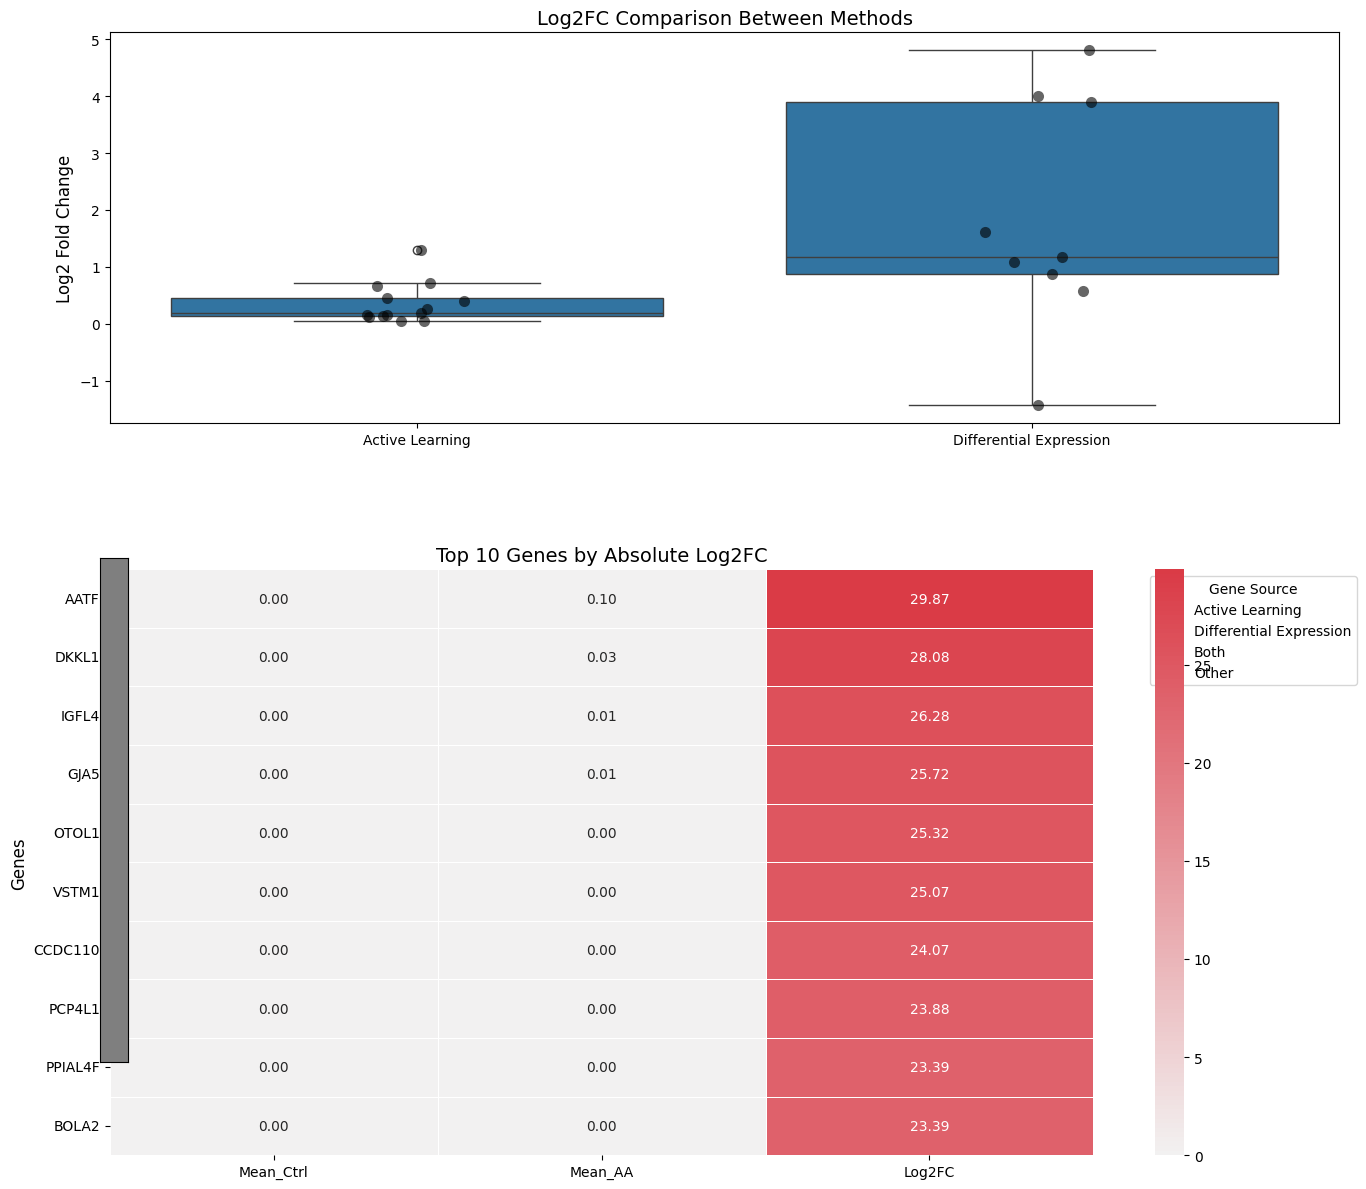

In [83]:

csv_file = 'differential_expression_results.csv'


active_learning_lists = [
   uncertainty_sampling_features,
   query_by_committee_features,
   fuzzy_knn_features,
   quire_features,
]

# Create the plot
fig = compare_gene_lists(csv_file, active_learning_lists, differential_gene_expression_features)
#plt.savefig('gene_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.show()